<a href="https://colab.research.google.com/github/AndresJoseHernandezSilva/Tareas-THC/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
link = "https://github.com/AndresJoseHernandezSilva/Tareas-THC/blob/archivos/EXECUTION_USA.csv"
code = "?raw=true"
url = link+code
df= pd.read_csv(url,sep = ",", index_col = 1)
df.describe()

,Age,Victim Count
count,1442.000000,1442.000000
mean,41.479889,1.537448
std,9.471676,4.495852
min,22.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,47.000000,1.750000
max,77.000000,168.000000


In [3]:
df.isnull().sum()

,0
Date,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,5
Victim Race,6
County,2
State,0


In [4]:
Estado = df.groupby("State").size().reset_index(name = "# Homicidas")
Estado.sort_values("# Homicidas", ascending = False)

,State,# Homicidas
30,TX,538
24,OK,112
32,VA,111
8,FL,92
16,MO,87
9,GA,69
0,AL,58
23,OH,53
27,SC,43
19,NC,43


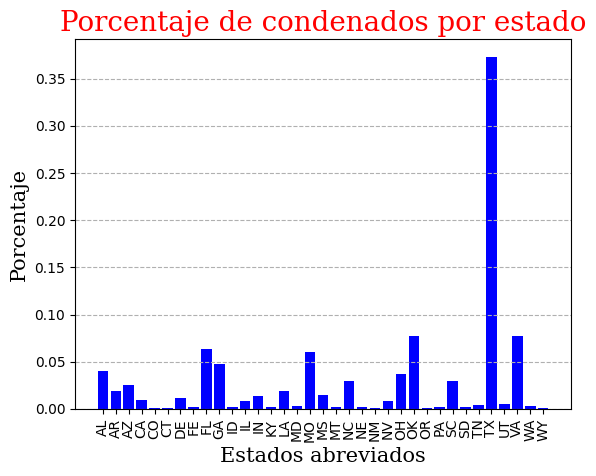

In [5]:
for i in range(len(Estado["# Homicidas"])) :
  Total_H = sum(Estado["# Homicidas"])
#print(Total_H)
y = Estado["# Homicidas"]/(Total_H)

plt.bar( Estado["State"] , y, color = "b")
plt.xticks(rotation = 90)
fuente2={"family":"serif", "color":"red", "size":20}
plt.title("Porcentaje de condenados por estado", fontdict=fuente2)
plt.grid(axis = "y", linestyle="--")
fuente1={"family":"serif","color":"black", "size":15}
plt.savefig("Estados_completos.png",dpi = 300, format = "png")
plt.ylabel("Porcentaje", fontdict=fuente1)
plt.xlabel("Estados abreviados", fontdict=fuente1)
plt.show()

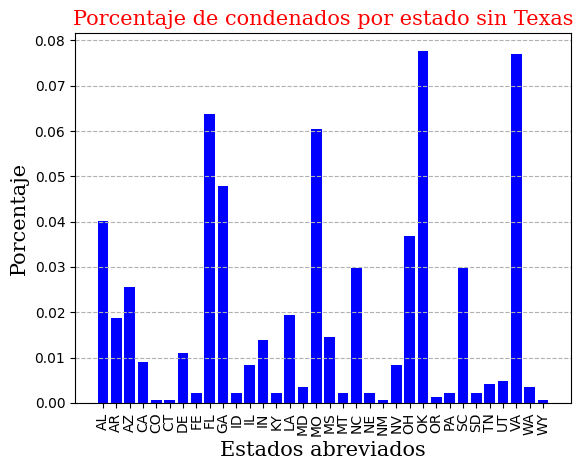

In [6]:
#Grafica de porcentaje de homicidas sin Texas para tener más detalle
for i in range(len(Estado["# Homicidas"])) :
  Total_H = sum(Estado["# Homicidas"])
#print(Total_H)
Estados_2 = Estado.drop(30)
y = Estados_2["# Homicidas"]/(Total_H)
fuente2={"family":"serif", "color":"red", "size":15}
plt.title("Porcentaje de condenados por estado sin Texas", fontdict=fuente2)
fuente1={"family":"serif","color":"black", "size":15}
plt.ylabel("Porcentaje", fontdict=fuente1)
plt.xlabel("Estados abreviados", fontdict=fuente1)
plt.bar( Estados_2["State"] , y, color = "b")
plt.xticks(rotation = 90)
plt.grid(axis = "y", linestyle="--")
plt.savefig("Estados_sin_TX.png",dpi = 300, format = "png")
plt.show()

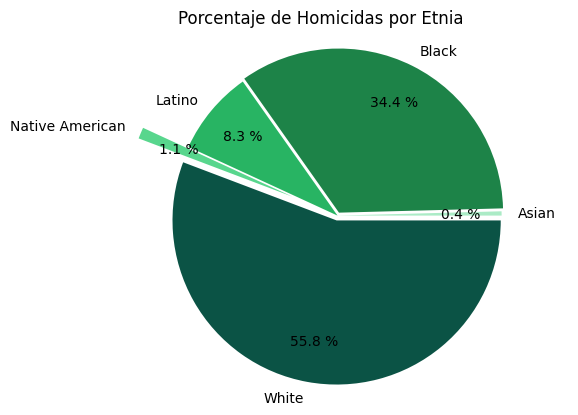

In [7]:
Etnia = df.groupby("Race").size().reset_index(name = "Homicidas por Etnia")
Etnia.sort_values("Homicidas por Etnia",ascending = True)
Etnia_2 = Etnia.drop(4)
desfase = (0, 0.02, 0, 0.3, 0.03)
colores = ["#abebc6", "#1d8348","#28b463","#58d68d","#0b5345"]
plt.pie(Etnia_2["Homicidas por Etnia"], labels = Etnia_2["Race"], autopct = "%0.1f %%",explode = desfase,
        radius = 1,pctdistance = 0.75,labeldistance = 1.1, colors=colores)

plt.title("Porcentaje de Homicidas por Etnia")

plt.axis("equal")
plt.savefig("Etnia.pie.png",dpi = 300, format = "png")
plt.show()

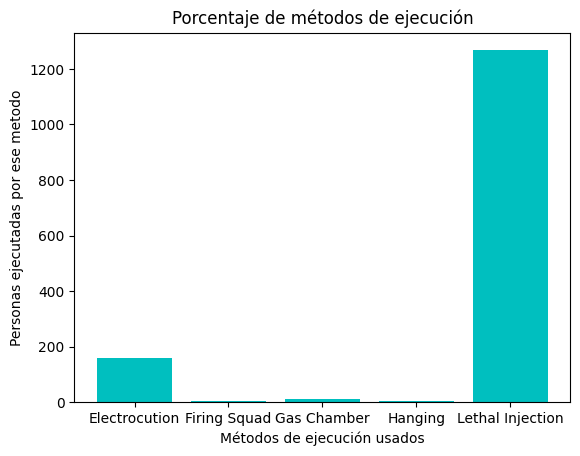

In [8]:
Metodo = df.groupby("Method").size().reset_index(name = "Tipo de método")
Metodo.sort_values("Tipo de método", ascending = False)


#Etnia_2 = Etnia.drop(4)
plt.bar( Metodo["Method"] , Metodo["Tipo de método"], color = "c")
plt.title("Porcentaje de métodos de ejecución")
plt.ylabel("Personas ejecutadas por ese metodo")
plt.xlabel("Métodos de ejecución usados")
#Firing saquad es fusilamiento, Gas chamber es cabina de gas, lethal injection es injección letal
#hanging es ahoracmiento
plt.savefig("Metodos barras.png",dpi = 300, format = "png")
plt.show()

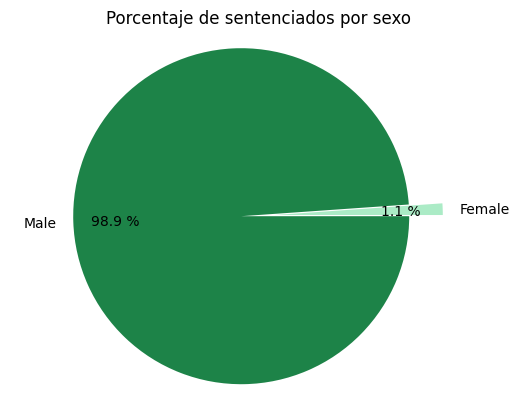

In [9]:
sexo = df.groupby("Sex").size().reset_index(name = "sexo")
sexo.sort_values("sexo", ascending = False)
desfase = (0, 0.2)
colores = ["#abebc6", "#1d8348"]
plt.pie(sexo["sexo"], labels = sexo["Sex"], autopct = "%0.1f %%",explode = desfase,
        radius = 1,pctdistance = 0.75,labeldistance = 1.1, colors=colores)

plt.title("Porcentaje de sentenciados por sexo")

plt.axis("equal")
plt.savefig("Sexo.png",dpi = 300, format = "png")
plt.show()

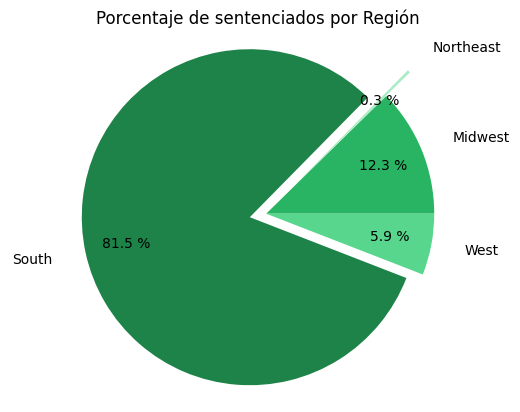

In [10]:
Región = df.groupby("Region").size().reset_index(name = "Sentenciados por region")
Región.sort_values("Sentenciados por region", ascending = False)
desfase = (0, 0.2, 0.1,0)
colores = ["#28b463","#abebc6","#1d8348","#58d68d"]
plt.pie(Región["Sentenciados por region"], labels = Región["Region"], autopct = "%0.1f %%",explode = desfase,
        radius = 1,pctdistance = 0.75,labeldistance = 1.2, colors=colores)

plt.title("Porcentaje de sentenciados por Región")

plt.axis("equal")
plt.savefig("Región.png",dpi = 300, format = "png")
plt.show()

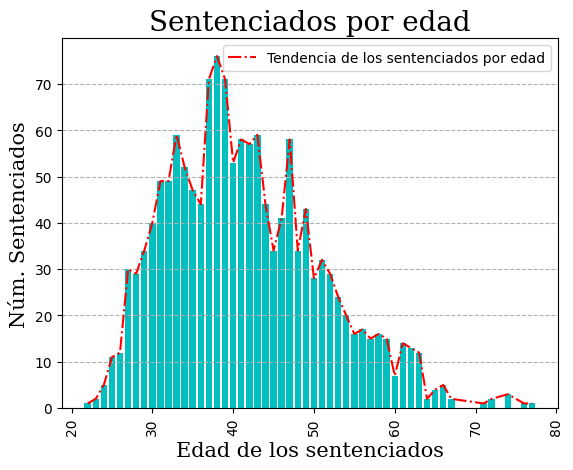

In [11]:
Edad = df.groupby("Age").size().reset_index(name = "#edad")
Edad.sort_values("#edad", ascending = False)

plt.plot(Edad["Age"] , Edad["#edad"], color = "r", linestyle="-.", label="Tendencia de los sentenciados por edad")
plt.bar( Edad["Age"] , Edad["#edad"], color = "c")
plt.xticks(rotation = 90)
fuente2={"family":"serif", "color":"black", "size":20}
fuente1={"family":"serif","color":"black", "size":15}
plt.legend()
plt.title("Sentenciados por edad", fontdict=fuente2)
plt.ylabel("Núm. Sentenciados", fontdict=fuente1)
plt.xlabel("Edad de los sentenciados", fontdict=fuente1)
plt.savefig("Edad.png",dpi = 300, format = "png")
plt.grid(axis = "y", linestyle="--")
plt.show()